# Integrate and fire model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def update_V(spikes, s, smax, V, Vreset, Vthresh, tau_ref, C, gL, EL, gE, 
             EE, gI, EI, sigma, tau_I, dt):
    '''Update V according to the integrate and fire model'''
    t = len(spikes)
    if np.sum(np.nonzero(spikes)) == 0:
        lastfire = -np.inf
    else:
        lastfire = np.max(np.nonzero(spikes))

    if (t - lastfire) * dt < tau_ref:
        #print(t, lastfire, dt, tau_ref)
        #print('Refractory')
        return 0, Vreset, s - s / tau_I * dt
    elif V >= Vthresh:
        #print('Spike!')
        return 1, Vreset, s + (smax - s) / smax
    else:
        #print('Update')
        noise = np.random.normal()
        Vdot = (gL * (EL - V) + gE * (EE - V) + gI * (EI - V) + sigma * noise) / C
        return 0, V + dt * Vdot, s - s / tau_I * dt
        
    

## Simulate a spike train with no inhibitory input

In [3]:
C = 0.2 #nF
gL = 10/1000 #uS
EL = -60 #mV
sigma = 0.6
Vreset = -61 #mV
Vthresh = -55 #mV
tau_ref = 2 #ms
EI = -75 #mV
EE = -5 #mV
spikes = []
V = -56 #mV
dt = 0.1 #ms
gE = 100/1000
gI = 0/1000

nsteps = 10000
Vlst = []
slst = []

# For the output
s = 6
tau_I = 80 #ms
smax = 7

for i in range(nsteps):
    state, V, s = update_V(spikes, s, smax, V, Vreset, Vthresh, tau_ref, C, gL, EL, gE, 
                 EE, gI, EI, sigma, tau_I, dt)
    spikes.append(state)
    Vlst.append(V)
    slst.append(s)
    
    

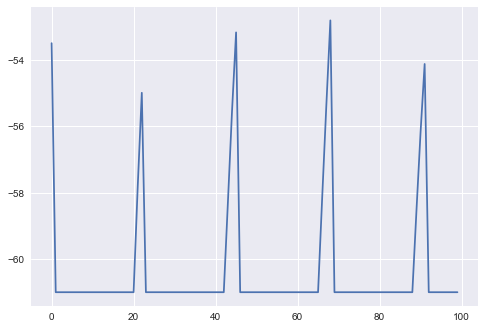

In [4]:
plt.plot(Vlst[:100])

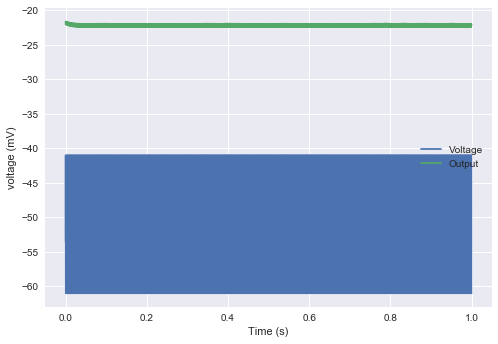

In [5]:
plt.plot(np.arange(nsteps) * dt / 1000, np.array(Vlst) + np.array(spikes) * 20,
        label='Voltage');
plt.plot(np.arange(nsteps) * dt / 1000, np.array(slst) * 3 - 40,
        label='Output')
#plt.ylim(-65, -40)
plt.xlabel('Time (s)')
plt.ylabel('voltage (mV)');
plt.legend();


In [6]:
x = np.array([[1,2,3,4],[4,3,2,4], [3,4,5,6]])
np.linalg.norm(x,axis=0)

array([ 5.09901951,  5.38516481,  6.164414  ,  8.24621125])

In [7]:
np.linalg.norm([2,3,4])

5.3851648071345037

## Vary the inhibitory input and observe changes in frequency

In [8]:
C = 0.2 #nF
gL = 0.01 #uS
EL = -60 #mV
sigma = 0.6
Vreset = -61 #mV
Vthresh = -55 #mV
tau_ref = 2 #ms
EI = -75 #mV
EE = -5 #mV
spikes = []
V = -60 #mV
dt = 0.1 #ms
gE = 2.0/1000

nsteps = 10000
Vlst = []
slst = []

# For the output
s = 6
tau_I = 80 #ms
smax = 7

gI_list = np.arange(8) / 1000
rate_lst = []

for gI in gI_list:
    spikes = []
    for i in range(nsteps):
        state, V, s = update_V(spikes, s, smax, V, Vreset, Vthresh, tau_ref, C, gL, EL, gE, 
                     EE, gI, EI, sigma, tau_I, dt)
        spikes.append(state)
        Vlst.append(V)
        #slst.append(s)
    rate_lst.append(np.sum(spikes))
    
    

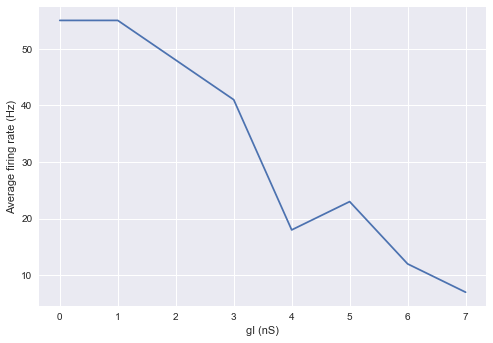

In [9]:
plt.plot(gI_list * 1000, rate_lst)
plt.xlabel('gI (nS)')
plt.ylabel('Average firing rate (Hz)')

In [186]:
idx

0.0050000000000000001